In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from models.svm import LinearSVM
from models.random_forest import RandomForest


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# SVM

### Data1

In [2]:
data1 = pd.read_csv('data/data1.csv')

In [3]:
# Extract features and labels
X = data1.drop('Class', axis=1).to_numpy()
y = data1['Class'].to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [5]:
classifier = LinearSVM()

classifier.train(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

train_accuracy = classifier.calculate_accuracy(y_train, y_pred_train)
test_accuracy = classifier.calculate_accuracy(y_test, y_pred_test)

print(f"Model accuracy:\n"
      f"Training data: {train_accuracy:.2f}%\n"
      f"Test data: {test_accuracy:.2f}%")

Model accuracy:
Training data: 98.42%
Test data: 100.00%


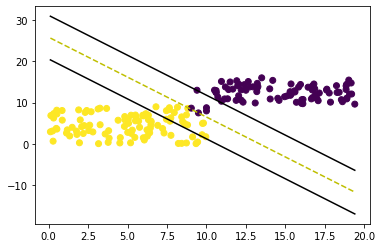

In [6]:
classifier.visualize(X_train)

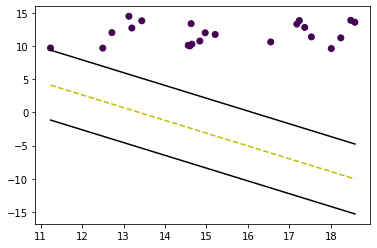

In [7]:
classifier.visualize(X_test)

### Data2

In [8]:
data2 = pd.read_csv('data/data2.csv')

In [9]:
# Extract features and labels
X = data2.drop('Class', axis=1).to_numpy()
y = data2['Class'].to_numpy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [11]:
classifier = LinearSVM()

classifier.train(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

train_accuracy = classifier.calculate_accuracy(y_train, y_pred_train)
test_accuracy = classifier.calculate_accuracy(y_test, y_pred_test)

print(f"Model accuracy:\n"
      f"Training data: {train_accuracy:.2f}%\n"
      f"Test data: {test_accuracy:.2f}%")

Model accuracy:
Training data: 50.74%
Test data: 43.33%


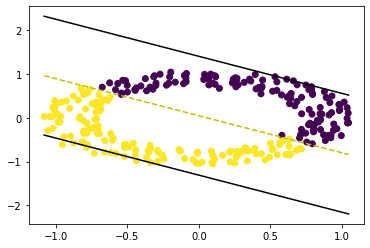

In [12]:
classifier.visualize(X_train)

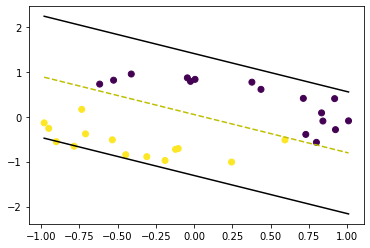

In [13]:
classifier.visualize(X_test)

## Non-linear SVM

In [14]:
classifier = SVC(kernel='rbf')

classifier.fit(X_train, y_train)

train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

print(f"Model accuracy:\n"
      f"Training data: {train_accuracy * 100 :.2f}%\n"
      f"Test data: {test_accuracy * 100 :.2f}%")

Model accuracy:
Training data: 98.15%
Test data: 100.00%


In [15]:
# From https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    return out

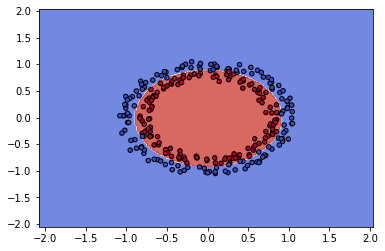

In [16]:
fig, ax = plt.subplots()

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])

plot_contours(ax, classifier, xx, yy)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.show()

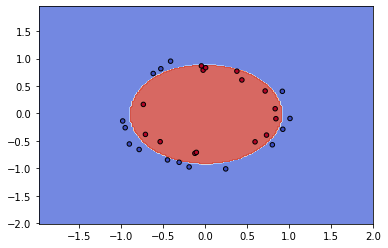

In [17]:
fig, ax = plt.subplots()

xx, yy = make_meshgrid(X_test[:, 0], X_test[:, 1])

plot_contours(ax, classifier, xx, yy)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.show()

# Random Forest

In [18]:
data3 = pd.read_csv('data/data3.csv')
data3['species'] = pd.factorize(data3['species'])[0] # Encode categories to 0, 1, and 2

In [19]:
train_set, test_set = train_test_split(data3.to_numpy(), test_size=0.2, random_state=3)

In [20]:
model = RandomForest(train_set, n_trees=10, seed=5)

model.get_accuracy(test_set)

100.0

### Confusion Matrix

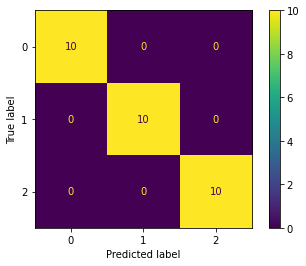

In [21]:
y_pred = model.predict(test_set)
y_true = test_set[:, -1]

model_confusion_matrix = model.create_confusion_matrix(test_set[:, -1], y_pred)
disp = ConfusionMatrixDisplay(np.array(model_confusion_matrix))
disp.plot();

### Impact of random tree numbers

In [22]:
train_set, test_set = train_test_split(data3.to_numpy(), test_size=0.2, random_state=3)

In [23]:
n_trees_values = np.arange(1, 10)
accuracies = []
for n_trees in n_trees_values:
    model = RandomForest(train_set, n_trees=n_trees, seed=5)
    accuracies.append(model.get_accuracy(test_set))

In [24]:
accuracies

[93.33333333333333,
 93.33333333333333,
 96.66666666666667,
 96.66666666666667,
 100.0,
 100.0,
 96.66666666666667,
 100.0,
 100.0]

# Adaboost

In [25]:
data4 = pd.read_csv('data/data4.csv')
data4.head(10)

,PassengerId,Pclass,Sex,Age,Target_class
0,1,3,male,22.0,0
1,2,1,female,38.0,1
2,3,3,female,26.0,1
3,4,1,female,35.0,1
4,5,3,male,35.0,0
5,6,3,male,NaN,0
6,7,1,male,54.0,0
7,8,3,male,2.0,0
8,9,3,female,27.0,1
9,10,2,female,14.0,1


In [26]:
data4.drop("PassengerId", axis=1, inplace=True)
data4.head(10)

,Pclass,Sex,Age,Target_class
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
5,3,male,NaN,0
6,1,male,54.0,0
7,3,male,2.0,0
8,3,female,27.0,1
9,2,female,14.0,1


In [27]:
data4.dropna(inplace=True)
data4.head(10)

,Pclass,Sex,Age,Target_class
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
6,1,male,54.0,0
7,3,male,2.0,0
8,3,female,27.0,1
9,2,female,14.0,1
10,3,female,4.0,1


### Age
- age <= 19: **Teenager**
- 20 <= age < 50: **Adult**
- 50 <= age < 65: **Middle Age**
- 65 <= age: **Elderly**

In [28]:
age = data4['Age'].copy()
age.loc[data4['Age'] <= 19] = "Teenager"
age.loc[(20 <= data4['Age']) & (data4['Age'] < 50)] = "Adult"
age.loc[(50 <= data4['Age']) & (data4['Age'] < 65)] = "Middle Age"
age.loc[data4['Age'] >= 65] = "Elderly"
data4['Age'] = age

data4.head(10)

,Pclass,Sex,Age,Target_class
0,3,male,Adult,0
1,1,female,Adult,1
2,3,female,Adult,1
3,1,female,Adult,1
4,3,male,Adult,0
6,1,male,Middle Age,0
7,3,male,Teenager,0
8,3,female,Adult,1
9,2,female,Teenager,1
10,3,female,Teenager,1


## Encoding categorical data using one-hot encoder

In [29]:
categorical_features = [column for column in data4 if column != 'Target_class']

data4 = pd.get_dummies(data4, columns=categorical_features)

# move Target_class to the last column
data4 = data4[[column for column in data4 if column != 'Target_class'] + ['Target_class']]  

data4.head(10)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Adult,Age_Elderly,Age_Middle Age,Age_Teenager,Target_class
0,0,0,1,0,1,1,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1
2,0,0,1,1,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0
6,1,0,0,0,1,0,0,1,0,0
7,0,0,1,0,1,0,0,0,1,0
8,0,0,1,1,0,1,0,0,0,1
9,0,1,0,1,0,0,0,0,1,1
10,0,0,1,1,0,0,0,0,1,1


In [30]:
X = data4.drop('Target_class', axis=1)
y = data4['Target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.7412587412587412

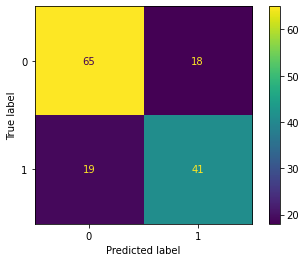

In [32]:
y_predict = clf.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict))
disp.plot();